In [1]:
from diffusers import AutoencoderKL

In [2]:
vae = AutoencoderKL.from_pretrained('stabilityai/sd-vae-ft-ema')

In [3]:
from PIL import Image
import torch
import numpy as np

In [4]:
scaling_factor = vae.scaling_factor

/tmp/ipykernel_1249343/4067447288.py:1: FutureWarning: Accessing config attribute `scaling_factor` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'scaling_factor' over 'AutoencoderKL's config object instead, e.g. 'unet.config.scaling_factor'.
  scaling_factor = vae.scaling_factor


In [13]:
img = Image.open('/mnt/ceph_rbd/zbc/ffhq-dataset/images1024x1024/17844.png').resize((128, 128))

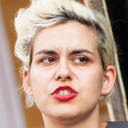

In [14]:
img

In [15]:
img_np = np.array(img)
img_torch = torch.tensor(img_np).permute(2, 0, 1).unsqueeze(0).float() / 255.0

In [16]:
enc = vae.encode(img_torch).latent_dist.sample().mul_(scaling_factor)

In [17]:
dec = vae.decode(enc / scaling_factor).sample

In [18]:
dec = dec.squeeze(0).permute(1, 2, 0).detach().cpu().clamp(min=0.0, max=1.0).numpy()
dec_img = Image.fromarray((dec * 255).astype(np.uint8))

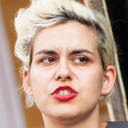

In [19]:
img

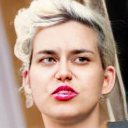

In [20]:
dec_img